In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
from sklearn import metrics
import random
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import scipy as sp
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from pylab import rcParams
get_ipython().run_line_magic('matplotlib', 'inline')
import folium
from folium.plugins import MarkerCluster

**Loading of data**

In [2]:
df=pd.read_csv(r'C:\Users\DELL\Downloads\police_department_data.csv')

In [3]:
df

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212120,"(37.775420706711, -122.403404791479)"
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212168,"(37.775420706711, -122.403404791479)"
2,141059263,WARRANTS,WARRANT ARREST,2016-04-25 14:59:00,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,14105926363010,"(37.7299809672996, -122.388856204292)"
3,160013662,NON-CRIMINAL,LOST PROPERTY,2016-01-05 23:50:00,TENDERLOIN,NONE,JONES ST / OFARRELL ST,16001366271000,"(37.7857883766888, -122.412970537591)"
4,160002740,NON-CRIMINAL,LOST PROPERTY,2016-01-01 00:30:00,MISSION,NONE,16TH ST / MISSION ST,16000274071000,"(37.7650501214668, -122.419671780296)"
...,...,...,...,...,...,...,...,...,...
150495,161061000,ASSAULT,BATTERY,2016-12-30 21:01:00,PARK,NONE,OAK ST / STANYAN ST,16106100004134,"(37.7714278595913, -122.453981622365)"
150496,176000742,NON-CRIMINAL,LOST PROPERTY,2016-12-30 08:00:00,CENTRAL,NONE,JACKSON ST / SANSOME ST,17600074271000,"(37.7966261239618, -122.401857374739)"
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,2016-12-29 20:00:00,CENTRAL,NONE,PINE ST / TAYLOR ST,17600075806372,"(37.7906727649886, -122.41226909106)"
150498,176000764,LARCENY/THEFT,GRAND THEFT OF PROPERTY,2016-12-30 10:00:00,CENTRAL,NONE,200 Block of STOCKTON ST,17600076406374,"(37.7882745285785, -122.406658711008)"


**Knowing about the data**

In [4]:
df.count()

incident_id            150500
category               150500
crime_description      150500
crime_date             150500
department_district    150499
resolution             150500
address                150500
department_id          150500
location               150500
dtype: int64

In [5]:
df.shape

(150500, 9)

In [6]:
df.isnull().sum()

incident_id            0
category               0
crime_description      0
crime_date             0
department_district    1
resolution             0
address                0
department_id          0
location               0
dtype: int64

In [7]:
df=pd.read_csv(r'C:\Users\DELL\Downloads\police_department_data.csv',parse_dates=['crime_date'])

**Preprocessing**

In [8]:
df['month']=df['crime_date'].dt.month

In [9]:
df['Hour']=df['crime_date'].dt.hour
df.head()

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location,month,Hour
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212120,"(37.775420706711, -122.403404791479)",1,11
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212168,"(37.775420706711, -122.403404791479)",1,11
2,141059263,WARRANTS,WARRANT ARREST,2016-04-25 14:59:00,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,14105926363010,"(37.7299809672996, -122.388856204292)",4,14
3,160013662,NON-CRIMINAL,LOST PROPERTY,2016-01-05 23:50:00,TENDERLOIN,NONE,JONES ST / OFARRELL ST,16001366271000,"(37.7857883766888, -122.412970537591)",1,23
4,160002740,NON-CRIMINAL,LOST PROPERTY,2016-01-01 00:30:00,MISSION,NONE,16TH ST / MISSION ST,16000274071000,"(37.7650501214668, -122.419671780296)",1,0


In [10]:
x=[]
y=[]
for row in df['location']:
        try:
            x.append(row.split(',')[0])
            y.append(row.split(',')[1])
        except:
            x.append(np.NaN)
            y.append(np.NaN)
df['latitude']=x
df['longitude']=y

df.head()

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location,month,Hour,latitude,longitude
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212120,"(37.775420706711, -122.403404791479)",1,11,(37.775420706711,-122.403404791479)
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212168,"(37.775420706711, -122.403404791479)",1,11,(37.775420706711,-122.403404791479)
2,141059263,WARRANTS,WARRANT ARREST,2016-04-25 14:59:00,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,14105926363010,"(37.7299809672996, -122.388856204292)",4,14,(37.7299809672996,-122.388856204292)
3,160013662,NON-CRIMINAL,LOST PROPERTY,2016-01-05 23:50:00,TENDERLOIN,NONE,JONES ST / OFARRELL ST,16001366271000,"(37.7857883766888, -122.412970537591)",1,23,(37.7857883766888,-122.412970537591)
4,160002740,NON-CRIMINAL,LOST PROPERTY,2016-01-01 00:30:00,MISSION,NONE,16TH ST / MISSION ST,16000274071000,"(37.7650501214668, -122.419671780296)",1,0,(37.7650501214668,-122.419671780296)


In [11]:
df.latitude=df.latitude.apply(lambda x:x.strip('('))
df.longitude=df.longitude.apply(lambda x:x.strip(')'))

df.head()

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location,month,Hour,latitude,longitude
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212120,"(37.775420706711, -122.403404791479)",1,11,37.775420706711,-122.403404791479
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212168,"(37.775420706711, -122.403404791479)",1,11,37.775420706711,-122.403404791479
2,141059263,WARRANTS,WARRANT ARREST,2016-04-25 14:59:00,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,14105926363010,"(37.7299809672996, -122.388856204292)",4,14,37.7299809672996,-122.388856204292
3,160013662,NON-CRIMINAL,LOST PROPERTY,2016-01-05 23:50:00,TENDERLOIN,NONE,JONES ST / OFARRELL ST,16001366271000,"(37.7857883766888, -122.412970537591)",1,23,37.7857883766888,-122.412970537591
4,160002740,NON-CRIMINAL,LOST PROPERTY,2016-01-01 00:30:00,MISSION,NONE,16TH ST / MISSION ST,16000274071000,"(37.7650501214668, -122.419671780296)",1,0,37.7650501214668,-122.419671780296


**Visualisation of monthwise crimes**

In [12]:
df['month'].value_counts()

10    13331
1     12946
12    12926
5     12713
11    12670
9     12473
8     12428
3     12362
4     12317
7     12166
2     12092
6     12076
Name: month, dtype: int64

In [13]:
month_count=df['month'].value_counts().reset_index().sort_values(by='index')
month_count.columns=['month','Count']
print(month_count)

    month  Count
1       1  12946
10      2  12092
7       3  12362
8       4  12317
3       5  12713
11      6  12076
9       7  12166
6       8  12428
5       9  12473
0      10  13331
4      11  12670
2      12  12926


In [14]:
trace = go.Scatter(
    x = month_count.month,
    y = month_count.Count
)

data=[trace]
py.iplot(data,filename='basic-line')

Crime rate is almost same throughout the year i.e. 12k-13k crimes happens in a month.

**Visualisation of hourly rimes**

In [15]:
df['Hour'].value_counts()

18    9718
17    9559
12    9021
19    8981
16    8656
15    8329
20    8098
14    7621
21    7480
13    7268
22    7099
0     6941
11    6786
23    6573
10    6483
9     5865
8     5575
1     4359
7     3894
2     3494
3     2553
6     2518
4     1885
5     1744
Name: Hour, dtype: int64

In [16]:
hour_count=df['Hour'].value_counts().reset_index().sort_values(by='index')
hour_count.columns=['Hour','Count']
print(hour_count)


    Hour  Count
11     0   6941
17     1   4359
19     2   3494
20     3   2553
22     4   1885
23     5   1744
21     6   2518
18     7   3894
16     8   5575
15     9   5865
14    10   6483
12    11   6786
2     12   9021
9     13   7268
7     14   7621
5     15   8329
4     16   8656
1     17   9559
0     18   9718
3     19   8981
6     20   8098
8     21   7480
10    22   7099
13    23   6573


In [17]:
trace = go.Scatter(
    x = hour_count.Hour,
    y = hour_count.Count
)

data=[trace]
py.iplot(data,filename='basic-line')

As opposed to general assumption crime rates are not high at night times, in fact they go on decreasing after 6pm till 5 am.
So night petrol does its work great. They now need to focus on daylight crimes.



### Visualisation of area wise crimes

**Heatmap**

In [18]:
m = folium.Map(
    location=[37.7749, -122.4194],
    tiles='Stamen Toner',
    zoom_start=13
)

marker_cluster = MarkerCluster(
    name='Crime Locations',
    overlay=True,
    control=False,
    icon_create_function=None
)
for k in range(1000):
    location = df.latitude.values[k], df.longitude.values[k]
    marker = folium.Marker(location=location,icon=folium.Icon(color='green'))
    popup = df.address.values[k]
    folium.Popup(popup).add_to(marker)
    marker_cluster.add_child(marker)

marker_cluster.add_to(m)

folium.LayerControl().add_to(m)

m.save("online.html")

m

Text(0.5, 0, 'Incidents (%)')

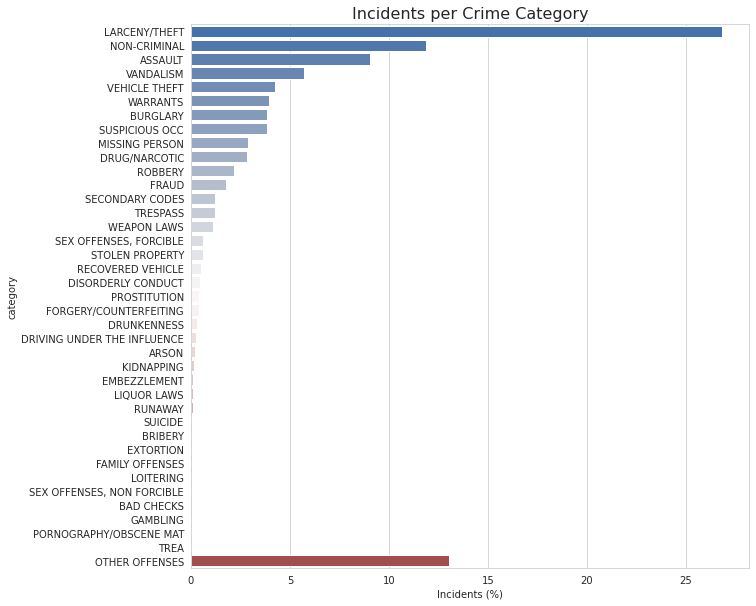

In [19]:
data = df.groupby('category').count().iloc[:, 0].sort_values(
 ascending=False)
data = data.reindex(np.append(np.delete(data.index, 1), 'OTHER OFFENSES'))

plt.figure(figsize=(10, 10))
with sns.axes_style("whitegrid"):
    ax = sns.barplot(
        (data.values / data.values.sum()) * 100,
        data.index,
        orient='h',
        palette="vlag")

plt.title('Incidents per Crime Category', fontdict={'fontsize': 16})
plt.xlabel('Incidents (%)')

More than 25% of incident is regarding theft of personal property as these type of crimes often occur in busy areas of city during rush hour.
More petrolling needs to be done accordingly.

**Area wise crimes**

In [20]:
def street_addr(x):
    street=x.split(' ')
    return (' '.join(street[-2:]))
df['addr']=df['address'].apply(lambda x:street_addr(x))
df['addr'].head()
x=df['addr'].value_counts()
x

MISSION ST    5921
MARKET ST     5472
BRYANT ST     4445
3RD ST        2002
FOLSOM ST     1809
              ... 
EMERSON ST       1
MABREY CT        1
BERGEN PL        1
VINTON CT        1
CHAVES AV        1
Name: addr, Length: 1667, dtype: int64

In [21]:
d=df['addr'].value_counts().sort_values(ascending=False).reset_index().head(10)
d.columns=['addr','Count']
data = [go.Bar(
            y=d.addr,
            x=d.Count,
             opacity=0.6,
             orientation = 'h'
    )]

py.iplot(data, filename='basic-bar')


They need to focus more on Mission St, Market St. and Bryant St. where crime rate is high compared to all the other streets or areas

In [22]:
s=df['department_district'].value_counts().reset_index().sort_values(by='index').head(10)
s.columns=['department_district','Count']
# Create a trace
tag = (np.array(s.department_district))
sizes = (np.array((s['Count'] / s['Count'].sum())*100))
plt.figure(figsize=(15,8))

trace = go.Pie(labels=tag, values=sizes)
layout = go.Layout(title='Top department districts with Most Crimes')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Activity Distribution")

<Figure size 1080x576 with 0 Axes>

Most of the crimes occur in outskirts of town where they need to focus rather than central part.